### 목표 : 부족한 피쳐를 조합 생성하여 모델 성능 향상
- 특성공학 => 피쳐 추출/선택/생성
- 비선형의 데이터에 대한 피쳐 생성 ==> 곡선형태의 회귀선 수식
- 모듈 : sklearn.preprocessing 내에 포함
- 데이터 : fish.csv
- 피쳐 : Perch의 Height, Length, Width
- 타겟 : Perch의 Weight
- 학습유형 : 지도학습

[1] 전처리 피쳐 조합 생성 살펴보기

In [269]:
# 모듈 로딩
from sklearn.preprocessing import PolynomialFeatures

In [270]:
# 인스턴스 생성
poly = PolynomialFeatures(include_bias=True)

In [271]:
poly.fit([[2,3]])

PolynomialFeatures()

In [272]:
poly.transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

In [273]:
poly = PolynomialFeatures(include_bias=False)

In [274]:
poly.fit([[2,3]])

PolynomialFeatures(include_bias=False)

In [275]:
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [276]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [277]:
poly = PolynomialFeatures(include_bias=False, degree=5)

In [278]:
poly.fit([[2,3]])

PolynomialFeatures(degree=5, include_bias=False)

In [279]:
poly.transform([[2,3]])

array([[  2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.,  16.,  24.,
         36.,  54.,  81.,  32.,  48.,  72., 108., 162., 243.]])

In [280]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

[2] Perch 데이터를 최대한 만족하는 회귀선을 찾기

[2-1] 모듈 로딩 및 데이터 준비

In [281]:
import pandas as pd
import matplotlib.pyplot as plt

In [282]:
# 데이터 준비
data_file = '../data/fish.csv'
dataDF = pd.read_csv(data_file)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [283]:
# 불필요한 컬럼 제거
dataDF.drop('Diagonal', axis='columns', inplace=True)

In [284]:
# Perch 행만 추출
perchDF = dataDF[dataDF.Species == 'Perch']

In [285]:
# Perch 행 삭제
perchDF = perchDF.drop(columns='Species').copy()

In [286]:
# 행 인덱스 초기화
perchDF.reset_index(drop=True, inplace=True)

In [287]:
perchDF

,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415
5,100.0,18.0,5.2224,3.3216
6,78.0,18.7,5.1992,3.1234
7,80.0,19.0,5.6358,3.0502
8,85.0,19.6,5.1376,3.0368
9,85.0,20.0,5.0820,2.7720


[2-2] 데이터 확인
- 학습 유형 결정위한 단계
- 피쳐 스케일링 진행 여부 체크

In [288]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(perchDF)
polyDF = poly.transform(perchDF)
polyDF

array([[5.90000000e+00, 8.40000000e+00, 2.11200000e+00, 1.40800000e+00,
        3.48100000e+01, 4.95600000e+01, 1.24608000e+01, 8.30720000e+00,
        7.05600000e+01, 1.77408000e+01, 1.18272000e+01, 4.46054400e+00,
        2.97369600e+00, 1.98246400e+00],
       [3.20000000e+01, 1.37000000e+01, 3.52800000e+00, 1.99920000e+00,
        1.02400000e+03, 4.38400000e+02, 1.12896000e+02, 6.39744000e+01,
        1.87690000e+02, 4.83336000e+01, 2.73890400e+01, 1.24467840e+01,
        7.05317760e+00, 3.99680064e+00],
       [4.00000000e+01, 1.50000000e+01, 3.82400000e+00, 2.43200000e+00,
        1.60000000e+03, 6.00000000e+02, 1.52960000e+02, 9.72800000e+01,
        2.25000000e+02, 5.73600000e+01, 3.64800000e+01, 1.46229760e+01,
        9.29996800e+00, 5.91462400e+00],
       [5.15000000e+01, 1.62000000e+01, 4.59240000e+00, 2.63160000e+00,
        2.65225000e+03, 8.34300000e+02, 2.36508600e+02, 1.35527400e+02,
        2.62440000e+02, 7.43968800e+01, 4.26319200e+01, 2.10901378e+01,
        1.208

In [289]:
poly_cols = poly.get_feature_names_out()
poly_cols

array(['Weight', 'Length', 'Height', 'Width', 'Weight^2', 'Weight Length',
       'Weight Height', 'Weight Width', 'Length^2', 'Length Height',
       'Length Width', 'Height^2', 'Height Width', 'Width^2'],
      dtype=object)

In [290]:
polyDF = pd.DataFrame(polyDF)
polyDF.columns = poly_cols
polyDF

,Weight,Length,Height,Width,Weight^2,Weight Length,Weight Height,Weight Width,Length^2,Length Height,Length Width,Height^2,Height Width,Width^2
0,5.9,8.4,2.1120,1.4080,34.81,49.56,12.4608,8.3072,70.56,17.74080,11.82720,4.460544,2.973696,1.982464
1,32.0,13.7,3.5280,1.9992,1024.00,438.40,112.8960,63.9744,187.69,48.33360,27.38904,12.446784,7.053178,3.996801
2,40.0,15.0,3.8240,2.4320,1600.00,600.00,152.9600,97.2800,225.00,57.36000,36.48000,14.622976,9.299968,5.914624
3,51.5,16.2,4.5924,2.6316,2652.25,834.30,236.5086,135.5274,262.44,74.39688,42.63192,21.090138,12.085360,6.925319
4,70.0,17.4,4.5880,2.9415,4900.00,1218.00,321.1600,205.9050,302.76,79.83120,51.18210,21.049744,13.495602,8.652422
5,100.0,18.0,5.2224,3.3216,10000.00,1800.00,522.2400,332.1600,324.00,94.00320,59.78880,27.273462,17.346724,11.033027
6,78.0,18.7,5.1992,3.1234,6084.00,1458.60,405.5376,243.6252,349.69,97.22504,58.40758,27.031681,16.239181,9.755628
7,80.0,19.0,5.6358,3.0502,6400.00,1520.00,450.8640,244.0160,361.00,107.08020,57.95380,31.762242,17.190317,9.303720
8,85.0,19.6,5.1376,3.0368,7225.00,1666.00,436.6960,258.1280,384.16,100.69696,59.52128,26.394934,15.601864,9.222154
9,85.0,20.0,5.0820,2.7720,7225.00,1700.00,431.9700,235.6200,400.00,101.64000,55.44000,25.826724,14.087304,7.683984


In [291]:
polyDF.corr()

,Weight,Length,Height,Width,Weight^2,Weight Length,Weight Height,Weight Width,Length^2,Length Height,Length Width,Height^2,Height Width,Width^2
Weight,1.000000,0.958656,0.968441,0.963943,0.977739,0.995309,0.995548,0.994196,0.982416,0.989600,0.988456,0.988481,0.987965,0.976745
Length,0.958656,1.000000,0.985584,0.974617,0.894681,0.941921,0.935647,0.932844,0.988895,0.982759,0.978448,0.969725,0.966038,0.951606
Height,0.968441,0.985584,1.000000,0.982943,0.907170,0.948519,0.950634,0.947599,0.978695,0.988285,0.981614,0.989343,0.983747,0.967599
Width,0.963943,0.974617,0.982943,1.000000,0.900598,0.941466,0.943088,0.952448,0.967603,0.974677,0.987686,0.974125,0.987468,0.989545
Weight^2,0.977739,0.894681,0.907170,0.900598,1.000000,0.989940,0.990602,0.986530,0.940032,0.948597,0.945357,0.948821,0.946004,0.933174
Weight Length,0.995309,0.941921,0.948519,0.941466,0.989940,1.000000,0.998182,0.995046,0.976739,0.981654,0.978593,0.978246,0.975705,0.962528
Weight Height,0.995548,0.935647,0.950634,0.943088,0.990602,0.998182,1.000000,0.996699,0.970023,0.980211,0.976841,0.981792,0.979048,0.965799
Weight Width,0.994196,0.932844,0.947599,0.952448,0.986530,0.995046,0.996699,1.000000,0.966278,0.976241,0.981292,0.977774,0.983321,0.978038
Length^2,0.982416,0.988895,0.978695,0.967603,0.940032,0.976739,0.970023,0.966278,1.000000,0.995484,0.990447,0.983469,0.979020,0.963626
Length Height,0.989600,0.982759,0.988285,0.974677,0.948597,0.981654,0.980211,0.976241,0.995484,1.000000,0.993905,0.996197,0.990906,0.974767


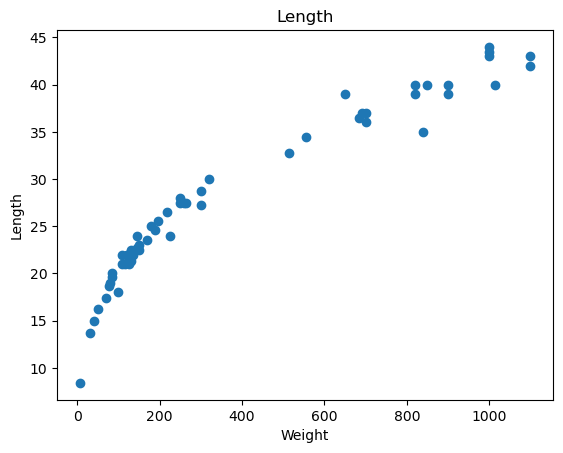

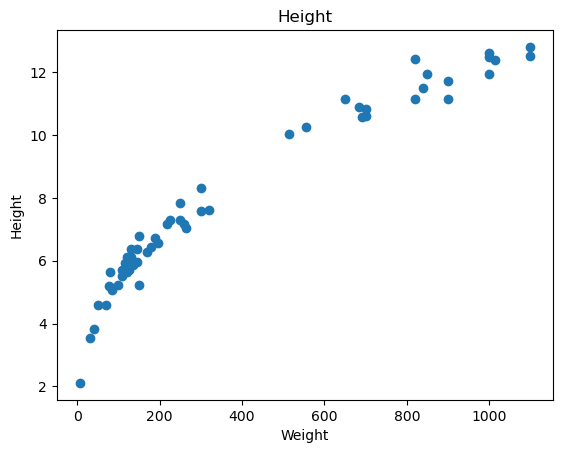

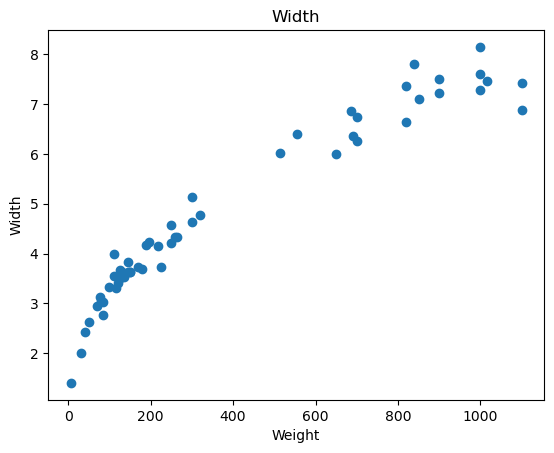

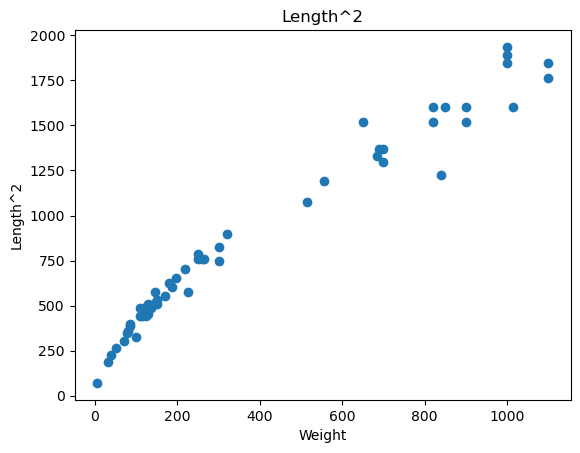

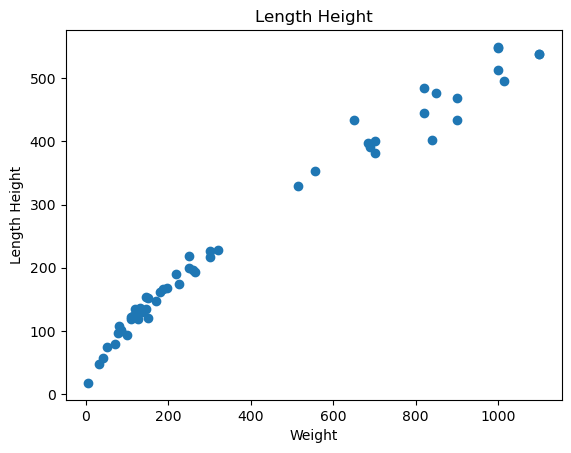

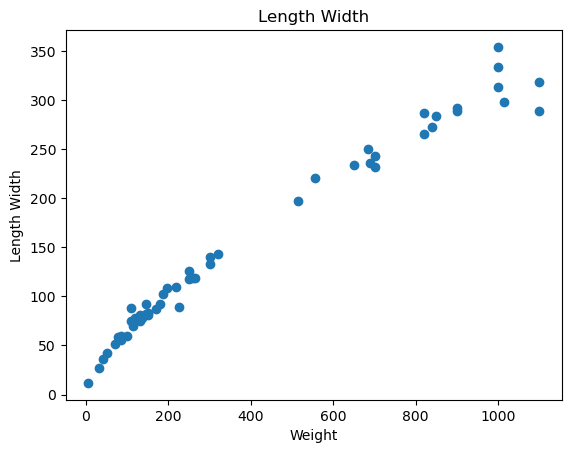

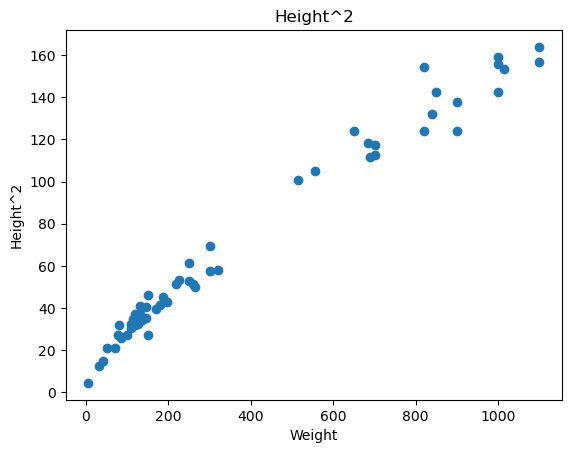

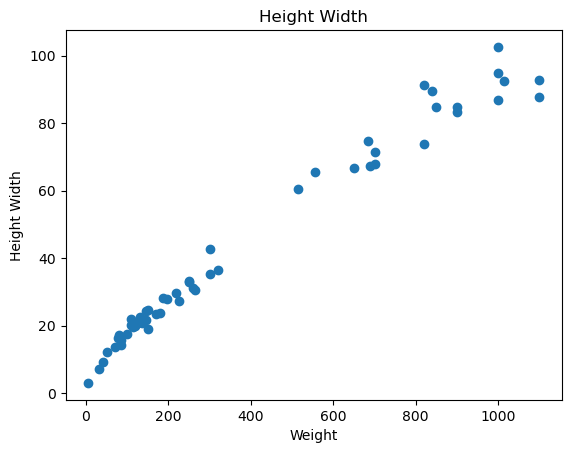

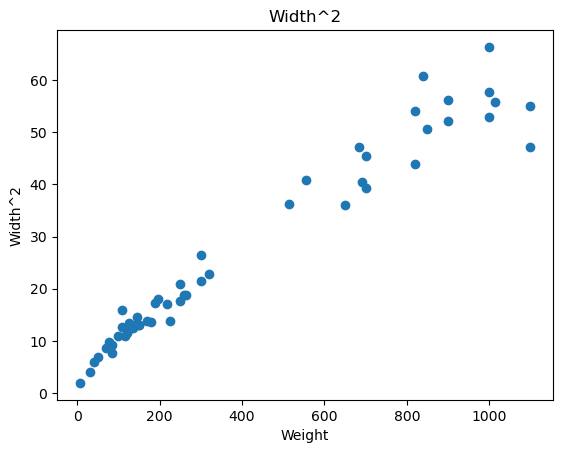

In [292]:
for col in [cols for cols in polyDF.columns if 'Weight' not in cols]:
    plt.scatter(polyDF['Weight'], polyDF[col])
    plt.title(col)
    plt.xlabel('Weight')
    plt.ylabel(col)
    plt.show()

In [293]:
poly3D = PolynomialFeatures(include_bias=False, degree=3)
poly3D.fit(perchDF)
poly3DF = pd.DataFrame(poly3D.transform(perchDF))
poly3DF.columns = poly3D.get_feature_names_out()
poly3DF

,Weight,Length,Height,Width,Weight^2,Weight Length,Weight Height,Weight Width,Length^2,Length Height,...,Length^3,Length^2 Height,Length^2 Width,Length Height^2,Length Height Width,Length Width^2,Height^3,Height^2 Width,Height Width^2,Width^3
0,5.9,8.4,2.1120,1.4080,34.81,49.56,12.4608,8.3072,70.56,17.74080,...,592.704,149.022720,99.348480,37.468570,24.979046,16.652698,9.420669,6.280446,4.186964,2.791309
1,32.0,13.7,3.5280,1.9992,1024.00,438.40,112.8960,63.9744,187.69,48.33360,...,2571.353,662.170320,375.229848,170.520941,96.628533,54.756169,43.912254,24.883611,14.100713,7.990404
2,40.0,15.0,3.8240,2.4320,1600.00,600.00,152.9600,97.2800,225.00,57.36000,...,3375.000,860.400000,547.200000,219.344640,139.499520,88.719360,55.918260,35.563078,22.617522,14.384366
3,51.5,16.2,4.5924,2.6316,2652.25,834.30,236.5086,135.5274,262.44,74.39688,...,4251.528,1205.229456,690.637104,341.660232,195.782829,112.190161,96.854349,55.500807,31.803833,18.224668
4,70.0,17.4,4.5880,2.9415,4900.00,1218.00,321.1600,205.9050,302.76,79.83120,...,5268.024,1389.062880,890.568540,366.265546,234.823475,150.552147,96.576225,61.917822,39.697313,25.451100
5,100.0,18.0,5.2224,3.3216,10000.00,1800.00,522.2400,332.1600,324.00,94.00320,...,5832.000,1692.057600,1076.198400,490.922312,312.241029,198.594478,142.432927,90.591531,57.618878,36.647301
6,78.0,18.7,5.1992,3.1234,6084.00,1458.60,405.5376,243.6252,349.69,97.22504,...,6539.203,1818.108248,1092.221746,505.492428,303.672690,182.430235,140.543114,84.430751,50.721459,30.470727
7,80.0,19.0,5.6358,3.0502,6400.00,1520.00,450.8640,244.0160,361.00,107.08020,...,6859.000,2034.523800,1101.122200,603.482591,326.616026,176.770681,179.005641,96.881189,52.433905,28.378207
8,85.0,19.6,5.1376,3.0368,7225.00,1666.00,436.6960,258.1280,384.16,100.69696,...,7529.536,1973.660416,1166.617088,517.340702,305.796528,180.754223,135.606612,80.156135,47.379740,28.005838
9,85.0,20.0,5.0820,2.7720,7225.00,1700.00,431.9700,235.6200,400.00,101.64000,...,8000.000,2032.800000,1108.800000,516.534480,281.746080,153.679680,131.251411,71.591679,39.050007,21.300004


In [294]:
poly3DF.corr()

,Weight,Length,Height,Width,Weight^2,Weight Length,Weight Height,Weight Width,Length^2,Length Height,...,Length^3,Length^2 Height,Length^2 Width,Length Height^2,Length Height Width,Length Width^2,Height^3,Height^2 Width,Height Width^2,Width^3
Weight,1.000000,0.958656,0.968441,0.963943,0.977739,0.995309,0.995548,0.994196,0.982416,0.989600,...,0.984608,0.990782,0.990901,0.992372,0.992879,0.986327,0.989693,0.990277,0.983706,0.970632
Length,0.958656,1.000000,0.985584,0.974617,0.894681,0.941921,0.935647,0.932844,0.988895,0.982759,...,0.967088,0.964296,0.962340,0.957565,0.955939,0.947248,0.947201,0.945602,0.936881,0.921711
Height,0.968441,0.985584,1.000000,0.982943,0.907170,0.948519,0.950634,0.947599,0.978695,0.988285,...,0.958881,0.966876,0.963736,0.970351,0.967833,0.958431,0.969614,0.967403,0.958190,0.942658
Width,0.963943,0.974617,0.982943,1.000000,0.900598,0.941466,0.943088,0.952448,0.967603,0.974677,...,0.947055,0.953656,0.964995,0.956204,0.967984,0.972532,0.954973,0.966884,0.971446,0.969099
Weight^2,0.977739,0.894681,0.907170,0.900598,1.000000,0.989940,0.990602,0.986530,0.940032,0.948597,...,0.961697,0.968670,0.966793,0.970939,0.969252,0.960841,0.968824,0.967032,0.958426,0.943684
Weight Length,0.995309,0.941921,0.948519,0.941466,0.989940,1.000000,0.998182,0.995046,0.976739,0.981654,...,0.988586,0.992801,0.991398,0.992310,0.991174,0.982913,0.987454,0.986271,0.977879,0.962967
Weight Height,0.995548,0.935647,0.950634,0.943088,0.990602,0.998182,1.000000,0.996699,0.970023,0.980211,...,0.981141,0.989435,0.987707,0.992975,0.991598,0.983231,0.992078,0.990744,0.982310,0.967464
Weight Width,0.994196,0.932844,0.947599,0.952448,0.986530,0.995046,0.996699,1.000000,0.966278,0.976241,...,0.976490,0.984483,0.989713,0.987842,0.993450,0.991888,0.986885,0.992550,0.990938,0.982611
Length^2,0.982416,0.988895,0.978695,0.967603,0.940032,0.976739,0.970023,0.966278,1.000000,0.995484,...,0.993859,0.991591,0.988961,0.984992,0.982649,0.972999,0.974405,0.972030,0.962291,0.945895
Length Height,0.989600,0.982759,0.988285,0.974677,0.948597,0.981654,0.980211,0.976241,0.995484,1.000000,...,0.989836,0.994056,0.990789,0.993669,0.990837,0.980808,0.989010,0.986291,0.976278,0.959687


In [306]:
import seaborn as sns

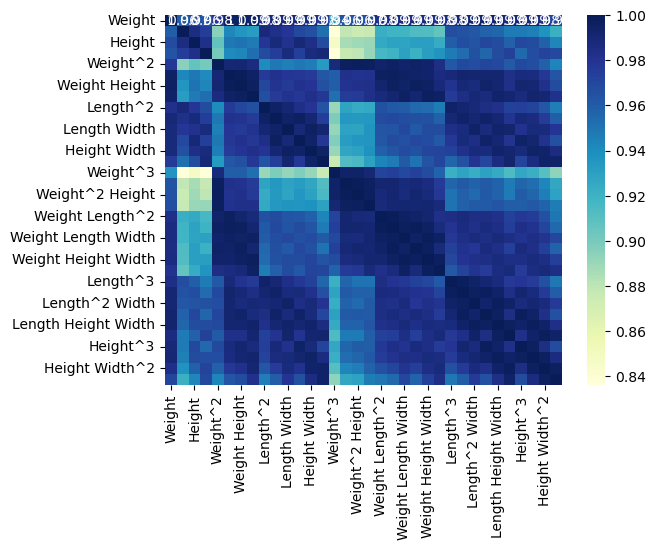

In [309]:
sns.heatmap(poly3DF.corr(), cmap='YlGnBu', annot=True)
plt.show()

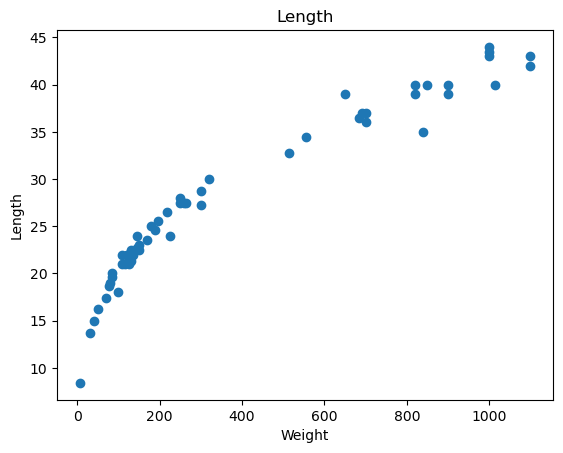

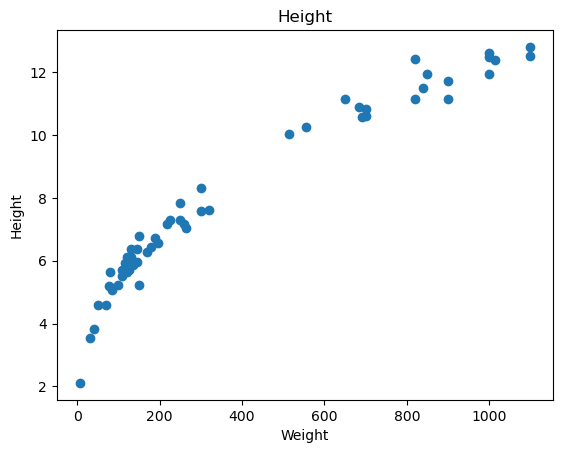

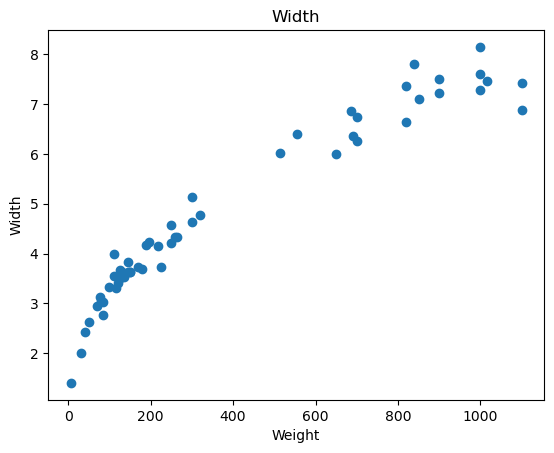

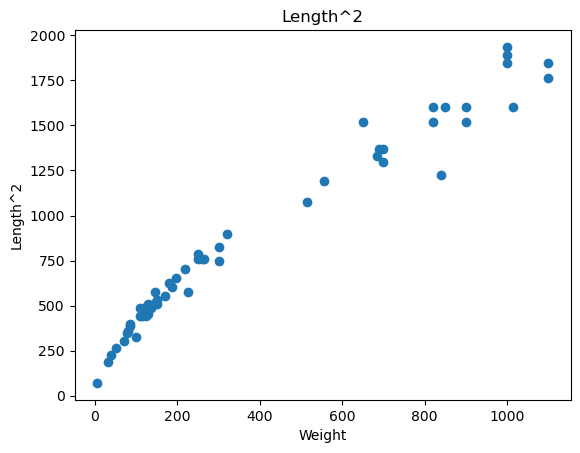

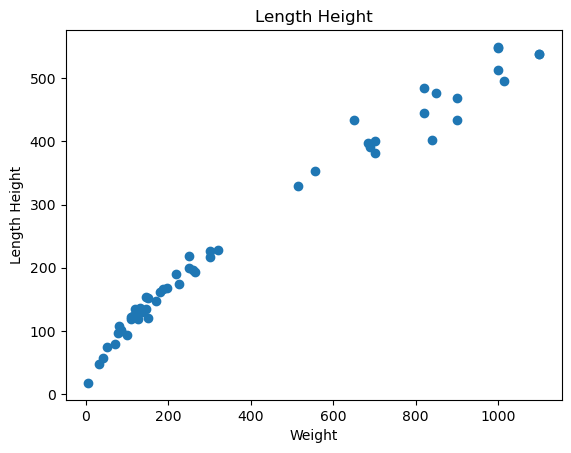

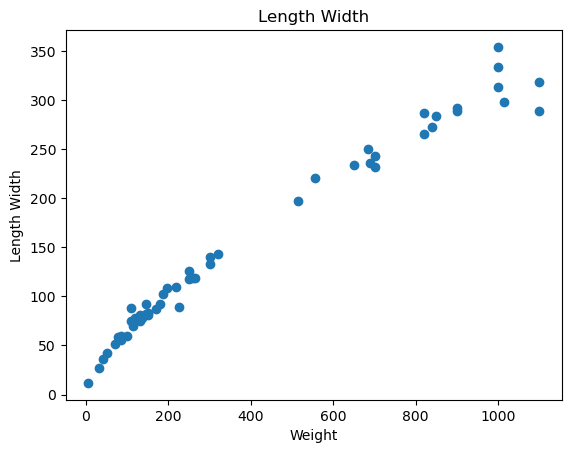

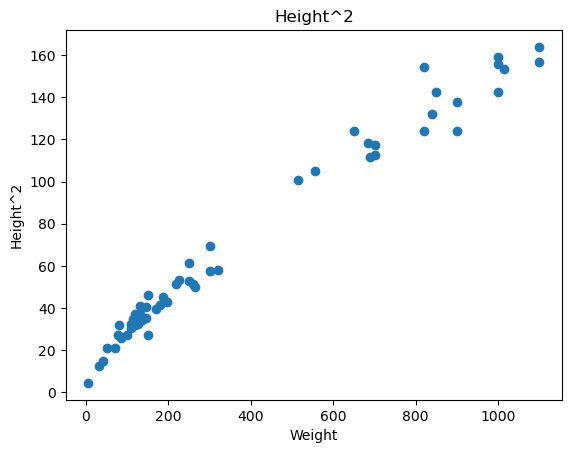

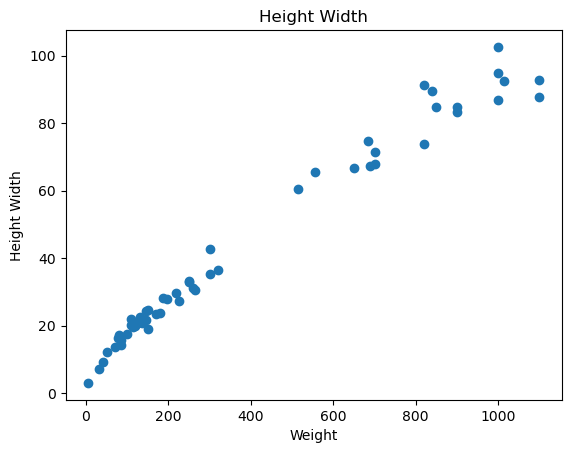

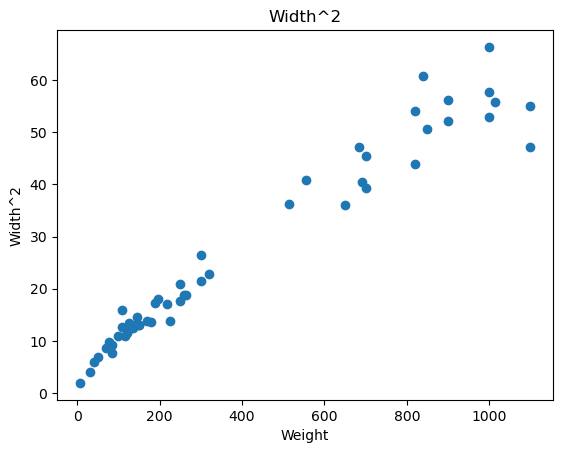

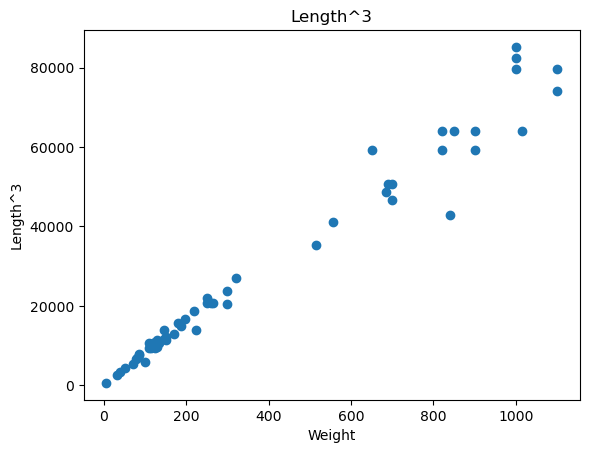

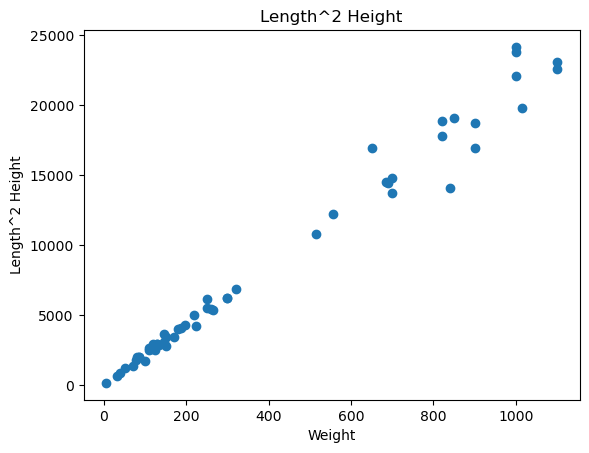

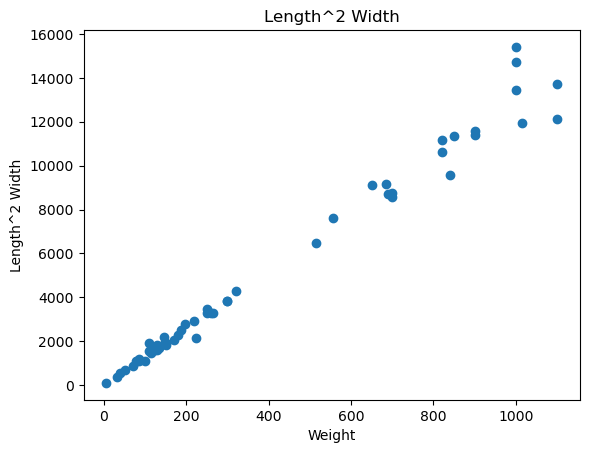

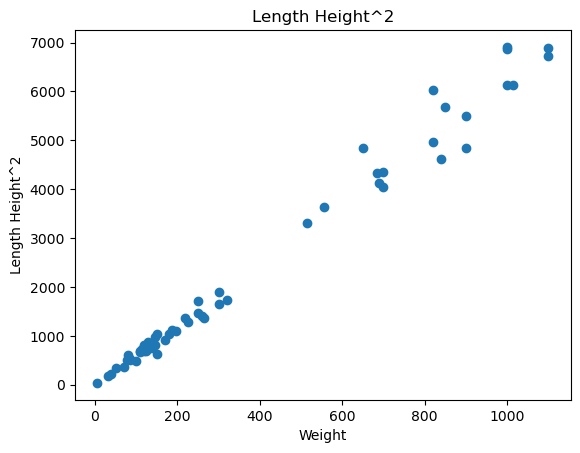

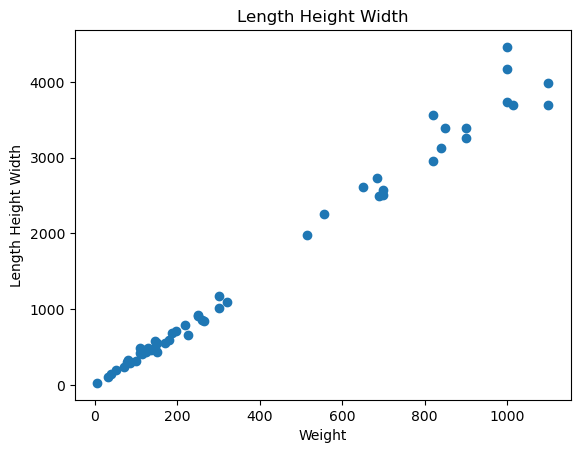

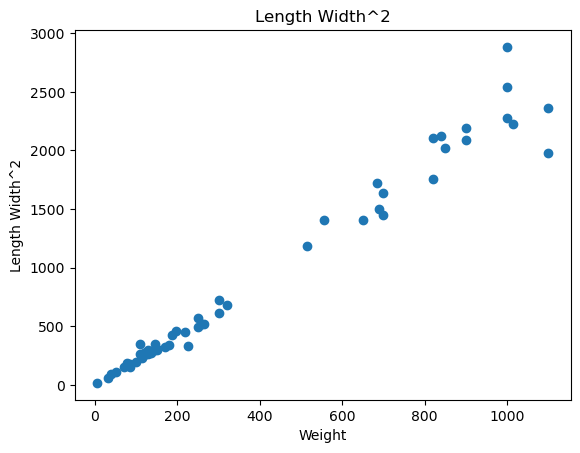

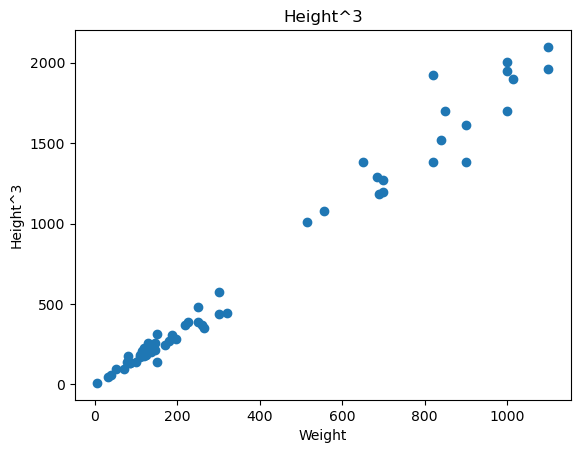

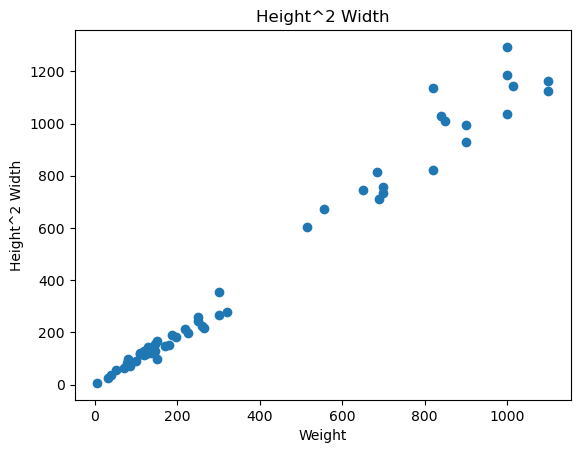

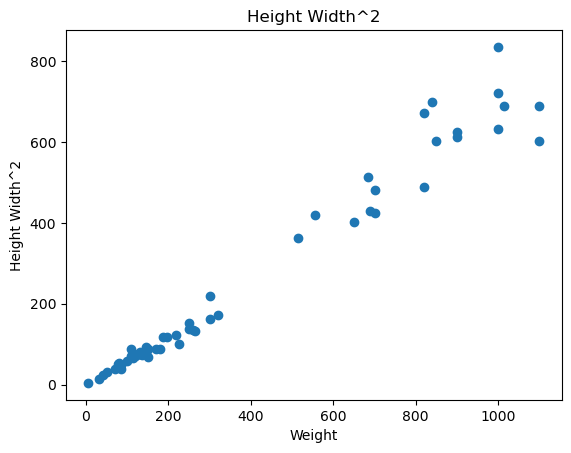

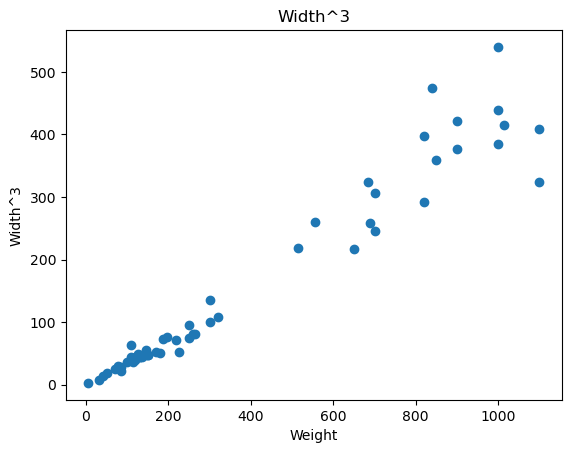

In [295]:
for col in [cols for cols in poly3DF.columns if 'Weight' not in cols]:
    plt.scatter(poly3DF['Weight'], poly3DF[col])
    plt.title(col)
    plt.xlabel('Weight')
    plt.ylabel(col)
    plt.show()

In [296]:
noHeightPoly3DF = poly3DF[[cols for cols in poly3DF.columns if 'Weight' not in cols][9:]]
# noHeightPoly3DF

In [297]:
target = poly3DF['Weight']
# target

In [298]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [299]:
X_train, X_test, y_train, y_test = train_test_split(noHeightPoly3DF, target,
                                                    test_size=0.2,
                                                    random_state=7)

In [300]:
Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)

LinearRegression()

In [301]:
Linear_model.score(X_train, y_train), Linear_model.score(X_test, y_test)

(0.9949046698655745, 0.7944316275906986)

In [302]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [303]:
std_Linear_model = LinearRegression()
std_Linear_model.fit(X_train_std, y_train)

std_Linear_model.score(X_train_std, y_train), std_Linear_model.score(X_test_std, y_test)

(0.994904669865591, 0.7944316275904341)

In [304]:
X_train, X_test, y_train, y_test = train_test_split(perchDF[perchDF.columns[1:]], perchDF['Weight'],
                                                    test_size=0.2,
                                                    random_state=7)

In [305]:
noPoly_Linear_model = LinearRegression()
noPoly_Linear_model.fit(X_train, y_train)

noPoly_Linear_model.score(X_train, y_train), noPoly_Linear_model.score(X_test, y_test)

(0.9409137196994103, 0.9402980203904981)

In [310]:
target = poly3DF['Weight^3']

In [311]:
X_train, X_test, y_train, y_test = train_test_split(noHeightPoly3DF, target,
                                                    test_size=0.2,
                                                    random_state=7)

In [312]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [313]:
std_Linear_model = LinearRegression()
std_Linear_model.fit(X_train_std, y_train)

std_Linear_model.score(X_train_std, y_train), std_Linear_model.score(X_test_std, y_test)

(0.9041469111758792, 0.821541557236213)

In [314]:
target = poly3DF['Weight']

In [317]:
X_train, X_test, y_train, y_test = train_test_split(noHeightPoly3DF[['Length Height Width']], target,
                                                    test_size=0.2,
                                                    random_state=7)

In [318]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [319]:
std_Linear_model = LinearRegression()
std_Linear_model.fit(X_train_std, y_train)

std_Linear_model.score(X_train_std, y_train), std_Linear_model.score(X_test_std, y_test)

(0.9844269775139156, 0.9928094814025497)

In [321]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [322]:
y_pre = std_Linear_model.predict(X_test_std)

print(f'r2_score : {r2_score(y_test, y_pre)}')
print(f'mean_squared_error : {mean_squared_error(y_test, y_pre)}')
print(f'mean_absolute_error : {mean_absolute_error(y_test, y_pre)}')

r2_score : 0.9928094814025497
mean_squared_error : 569.1832761410449
mean_absolute_error : 18.26682446799808
